In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load the data
data = pd.read_csv('Database/ChatGPT_ Quality of AI-Driven Services in Education  (Responses) - Form Responses 1 (1).csv')

In [3]:
# Step 1: Data Cleaning
# Drop duplicates
data = data.drop_duplicates()

# Handle missing values (example: fill with median or drop rows)
data.fillna(data.median(numeric_only=True), inplace=True)

# Convert timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [4]:
# Step 2: Descriptive Statistics
print("Summary Statistics:")
print(data.describe())

print("Categorical Value Counts:")
for col in ['Profession', 'Academic Level']:
    print(data[col].value_counts())

Summary Statistics:
                           Timestamp
count                             35
mean   2025-01-05 14:23:13.771428608
min              2025-01-05 01:45:46
25%       2025-01-05 09:20:07.500000
50%              2025-01-05 14:27:12
75%       2025-01-05 16:18:01.500000
max              2025-01-06 22:51:12
Categorical Value Counts:
Profession
Student               24
Corporate employee     9
Teacher                2
Name: count, dtype: int64
Academic Level
Graduate         15
Post Graduate    12
Undergraduate     8
Name: count, dtype: int64


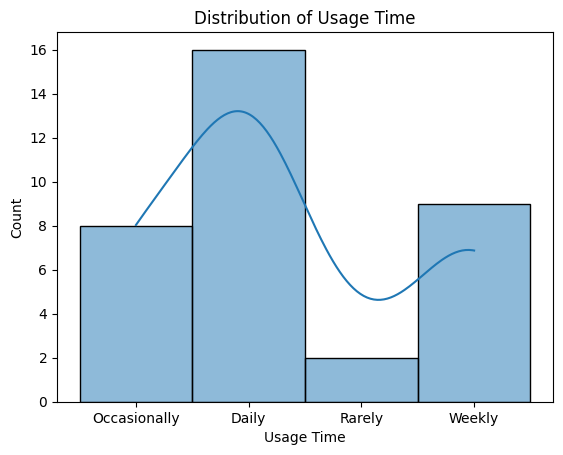

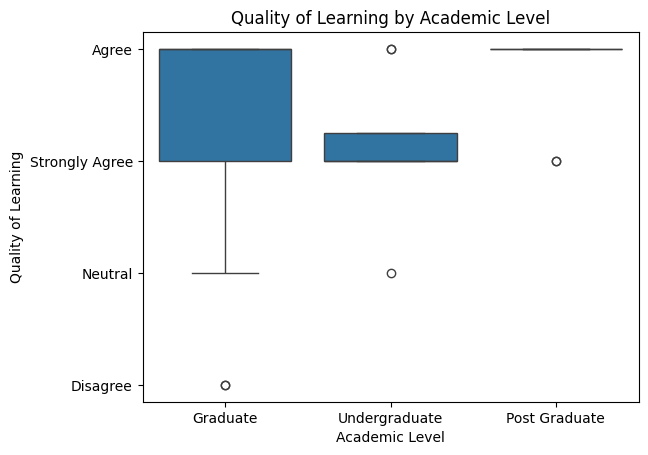

In [5]:
# Step 3: Visualization
# Histogram of Usage Time
sns.histplot(data['Usage Time'], kde=True)
plt.title('Distribution of Usage Time')
plt.show()

# Boxplot for Quality of Learning by Academic Level
sns.boxplot(x='Academic Level', y='Quality of Learning', data=data)
plt.title('Quality of Learning by Academic Level')
plt.show()

In [6]:
# Step 4: Correlation Heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Handle missing or empty data
if numeric_data.empty:
    print("No numeric columns found in the data.")
else:
    # Handle NaN values
    numeric_data = numeric_data.dropna(axis=1, how='all')  # Drop columns with all NaN values
    numeric_data = numeric_data.fillna(0)  # Fill remaining NaN values

    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

No numeric columns found in the data.
